In [1]:
import pandas as pd
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target



In [2]:
# Load Breast Cancer dataset
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['target'] = breast_cancer.target

In [3]:
# Split Iris dataset into training and testing sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris_df.drop(columns=['target']), iris_df['target'], test_size=0.2, random_state=42)

# Split Breast Cancer dataset into training and testing sets
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    breast_cancer_df.drop(columns=['target']), breast_cancer_df['target'], test_size=0.2, random_state=42)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.losses = []

    def sigmoid(self, z):
        # Clip values to avoid overflow
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_predicted):
        # Clip values to avoid log(0)
        y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)
        return -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_predicted - y))
            db = (1 / self.m) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and store the loss
            loss = self.compute_loss(y, y_predicted)
            self.losses.append(loss)

            # Debugging: Print loss every 100 iterations
            if i % 100 == 0:
                print(f'Iteration {i}: Loss = {loss}')

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

In [5]:
# Prepare the data
X_train_iris = X_train_iris.values
X_test_iris = X_test_iris.values
y_train_iris = y_train_iris.values
y_test_iris = y_test_iris.values

X_train_bc = X_train_bc.values
X_test_bc = X_test_bc.values
y_train_bc = y_train_bc.values
y_test_bc = y_test_bc.values


In [13]:
# Logistic Regression for Iris dataset
log_reg_iris = LogisticRegression(learning_rate=0.01, num_iterations=10)
log_reg_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = log_reg_iris.predict(X_test_iris)
accuracy_iris = np.mean(y_pred_iris == y_test_iris)
print(f'Iris Dataset Accuracy: {accuracy_iris:.2f}')

Iteration 0: Loss = 0.6931471805599453
Iris Dataset Accuracy: 0.30


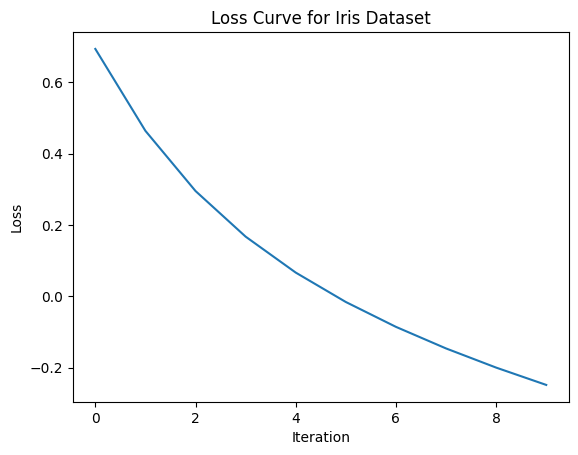

In [14]:
# Plot the loss for Iris dataset
plt.plot(log_reg_iris.losses)
plt.title('Loss Curve for Iris Dataset')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [15]:
# Logistic Regression for Breast Cancer dataset
log_reg_bc = LogisticRegression(learning_rate=0.01, num_iterations=10)
log_reg_bc.fit(X_train_bc, y_train_bc)
y_pred_bc = log_reg_bc.predict(X_test_bc)
accuracy_bc = np.mean(y_pred_bc == y_test_bc)
print(f'Breast Cancer Dataset Accuracy: {accuracy_bc:.2f}')


Iteration 0: Loss = 0.6931471805599453
Breast Cancer Dataset Accuracy: 0.38
